# Horse to Zebra conversion with CycleGAN

In [1]:
#export
from fastai.vision.all import *
from fastai.basics import *
from upit.models.cyclegan import *
from upit.train.cyclegan import *
from upit.data.unpaired import *

In [3]:
horse2zebra = untar_data('https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip')

In [4]:
folders = horse2zebra.ls().sorted()

In [5]:
trainA_path = folders[2]
trainB_path = folders[3]
testA_path = folders[0]
testB_path = folders[1]

In [6]:
dls = get_dls(trainA_path, trainB_path,load_size=286)

In [7]:
cycle_gan = CycleGAN(3,3,64)
learn = cycle_learner(dls, cycle_gan,opt_func=partial(Adam,mom=0.5,sqr_mom=0.999))

/home/tmabraham/anaconda3/lib/python3.7/site-packages/fastai/callback/core.py:50: UserWarning: You are setting an attribute (training) that also exists in the learner, so you're not setting it in the learner but in the callback. Use `self.learn.training` otherwise.
  warn(f"You are setting an attribute ({name}) that also exists in the learner, so you're not setting it in the learner but in the callback. Use `self.learn.{name}` otherwise.")


SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=5.248074739938602e-05)

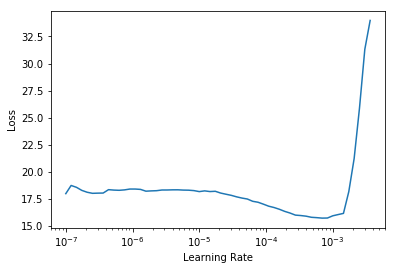

In [8]:
#cuda
learn.lr_find()

In [ ]:
#cuda
learn.fit_flat_lin(100,100,2e-4)

In [13]:
#cuda
learn.save('h2z-85epoch')

Path('models/h2z-85epoch.pth')

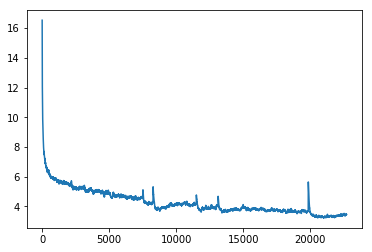

In [10]:
#cuda
learn.recorder.plot_loss(with_valid=False)

In [14]:
#cuda
learn = learn.load('h2z-85epoch')

In [15]:
#cuda
b = dls.train.one_batch()
_,_,preds = learn.get_preds(dl=[b], with_decoded=True)

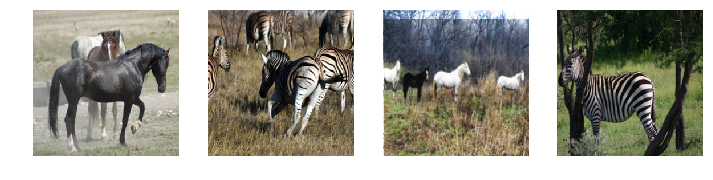

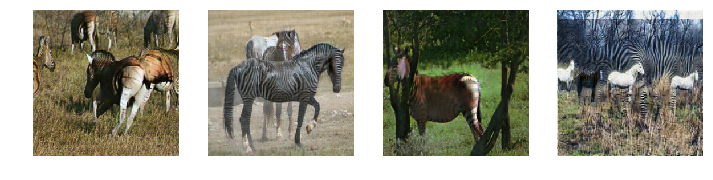

In [19]:
#cuda
dls.show_batch((b[0], b[1]), max_n=2, show=True)
dls.show_batch((preds[0],preds[1]), max_n=2, show=True)